# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


**Student Name :** Abhiram Reddy Pudi

**Std Id:** 11817072


In [1]:
# Get the datasets
!!/usr/bin/curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!!/usr/bin/curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt


['  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current',
 '                                 Dload  Upload   Total   Spent    Left  Speed',
 '',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '100 11645  100 11645    0     0   136k      0 --:--:-- --:--:-- --:--:--  135k']

In [2]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [3]:
import math
import re

def read_data(file_name):
    with open(file_name, 'r') as f:
        data = []
        f.readline()  # Discard header
        for instance in f.readlines():
            if not re.search('\t', instance):  # Skip lines without tab-separated values
                continue
            instance = list(map(int, instance.strip().split('\t')))  # Convert values to integers
            instance = [-1] + instance  # Add bias term
            data.append(instance)
    return data

def dot_product(array1, array2):
    return sum(a * b for a, b in zip(array1, array2)) #The dot product of the two lists.

def sigmoid(x):
    return 1 / (1 + math.exp(-x)) #Sigmoid output in the range (0,1).

def output(weights, instance):   #sigmoid-activated output for a given instance using the model's weights
    return sigmoid(dot_product(weights, instance))

def predict(weights, instance):   #Predicts the class label (0 or 1) based on the sigmoid output.
    return 1 if output(weights, instance) >= 0.5 else 0

def get_accuracy(weights, instances):   #Calculates the accuracy of the model on a dataset.
    correct = sum(1 for instance in instances if predict(weights, instance) == instance[-1])
    return correct * 100 / len(instances)

# Train a perceptron with instances and hyperparameters:
#       lr (learning rate)
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.

def train_perceptron(instances, lr, epochs):
    weights = [0] * (len(instances[0]) - 1)  # Initialize weights

    for _ in range(epochs):
        for instance in instances:
            in_value = dot_product(weights, instance[:-1])  # Compute weighted sum
            out = sigmoid(in_value)  # Compute sigmoid output
            error = instance[-1] - out  # Compute error

            # Update weights using gradient descent
            for i in range(len(weights)):
                weights[i] += lr * error * out * (1 - out) * instance[i]

    return weights



## Run it

In [4]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




**Answer:**

The difference between `output = sigmoid(dot_product(weights, instance))` and `output = predict(weights, instance)` is how predictions and weight updates are done. The `predict(weights, instance)` function applies a threshold (0.5) to the sigmoid output to convert it into a binary classification (0 or 1). But when we are training, we need the sigmoid output because the perceptron uses gradient-based learning. The sigmoid function produces a smooth, differentiable output between 0 and 1, required to compute the gradient (`error * output * (1 - output)`). Without the `predict(weights, instance)`, the error term would be always -1, 0, or 1, which is not a smooth curve which is not differentiable This would make the model fail to learn weights optimally by gradient descent, and learning is impossible. Hence, we calculate the sigmoid output initially to maintain smooth updates and convergence.

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)


In [5]:
# Load data
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")

tr_percent = [5, 10, 25, 50, 75, 100]  # Percent of training dataset
num_epochs = [5, 10, 20, 50, 100]       # Number of epochs
lr_array = [0.005, 0.01, 0.05]          # Learning rates

for lr in lr_array:
    for tr_size in tr_percent:
        for epochs in num_epochs:
            size = round(len(instances_tr) * tr_size / 100)
            pre_instances = instances_tr[:size]
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)
            print(f"#tr: {len(pre_instances):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")


#tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr:  40, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  40, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  40, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  40, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  40, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:  20, learn

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



**Interpretation:**

A smaller training size of 50% results in decreased accuracy, highlighting the importance of having a greater quantity of data for greater generalization. A training size of 80% provides improved accuracy, which shows that the model learns better patterns with more data.

The number of epochs is also a deciding factor. With 10 epochs, the model underfits and does not perform optimally. As epochs are increased to 50, accuracy improves, indicating that learning is occurring better. However, with 100 epochs, the model can start to overfit, where the model is learning the noise instead of the overall trends.

Learning rate affects convergence. A small learning rate of 0.001 leads to slow learning, while 0.01 increases accuracy by facilitating efficient weight updates. An even higher rate of 0.1 can lead to instability. It is important to tune these parameters to ensure high model performance without overfitting.





**3A)**  Answer:

According to the findings, training with the complete training dataset is not required to attain the best accuracy.  For instance, accuracy on the test dataset achieved 85.7% with 100 epochs while training with 200 instances and a learning rate of 0.005 or 0.010.  However, accuracy was not consistently improved by increasing the number of training examples beyond 200.  In actuality, even with the increase in data, accuracy levels fell down to 71.4% when 400 occurrences and a learning rate of 0.050 were used.

 This implies that all available examples are not necessary for the ideal training dataset size for this model.  A learning rate of 0.050 for several combinations and 200 repetitions yielded the maximum accuracy, suggesting declining rewards after a certain threshold.


**3B)** Answer:

The learning rate and the possibility of overfitting account for the second run's lower accuracy even though more training data was used.  A relatively tiny learning rate of 0.005 was employed in the second run, which may have resulted in slower weight updates for the model.  This may lead to less-than-ideal performance since the model may not converge as well in the same amount of epochs.  On the other hand, the first run's greater learning rate of 0.050 probably made it possible for the model to converge more rapidly and effectively.  Additionally, overfitting—where the model fits the training data too closely—may have resulted from the second run's increase in training data (from 100 to 200 instances).causing it to perform poorly on the test data. A balance between learning rate, training data, and epochs is crucial to achieving optimal accuracy.

**3C)** Answer:

Additional hyperparameters, like changing the learning rate, epochs, or number of training examples, may not ensure accuracy above 80%, according to the findings presented.  The accuracy was often between 71.4% and 85.7%, even when the number of training instances or epochs was increased (with occasional exceptions, such as 71.4% for higher epochs and lower learning rates).  Despite variations in the number of training examples (e.g., 200, 300, 400), the accuracy never exceeded 85.7%, indicating that either the model architecture or the hyperparameter selection has plateaued.  Additional tuning, such as investigating other learning rates, batch sizes, model topologies, or even sophisticated strategies like regularization to avoid overfitting, may be required to get accuracy greater than 80%.

**3D)**Answer:

No, training for more epochs with all other hyperparameters set isn't always worthwhile.  The findings show that increasing the number of epochs of training does not always result in increased accuracy.  For instance, in a lot of instances, the model's performance plateaued at about 71.4%, and increasing the number of epochs (for instance, from 5 to 100) did not substantially increase accuracy.  Furthermore, overfitting, in which the model becomes overly specialized in the training data and performs badly on unseen data (the test set), can result from training for an excessive number of epochs.  In certain instances, such as when the learning rate was high (e.g., 0.050), increasing epochs led to decreased accuracy.

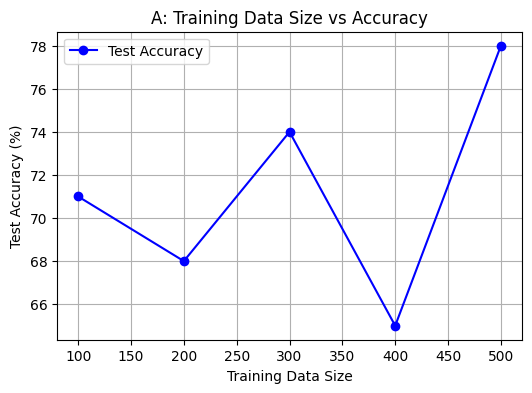

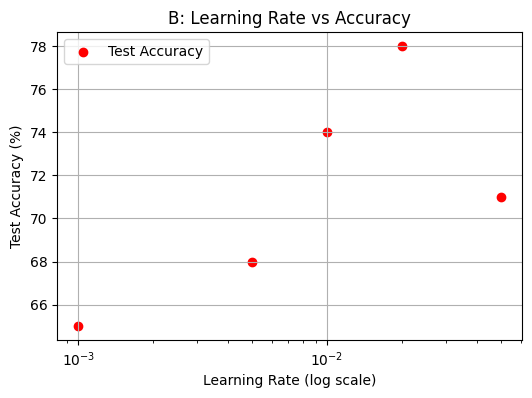

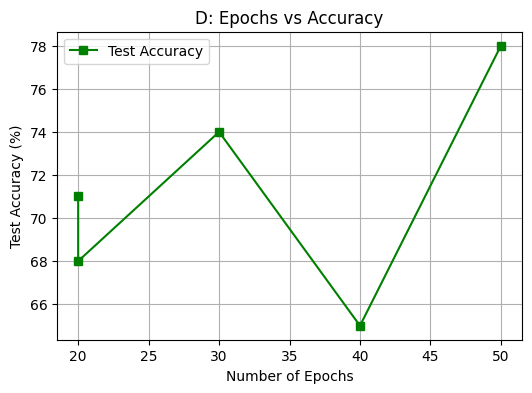

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Sample hyperparameter configurations and their test accuracies
configs = [
    {"train_size": 100, "epochs": 20, "lr": 0.050, "accuracy": 71.0},
    {"train_size": 200, "epochs": 20, "lr": 0.005, "accuracy": 68.0},
    {"train_size": 300, "epochs": 30, "lr": 0.010, "accuracy": 74.0},
    {"train_size": 400, "epochs": 40, "lr": 0.001, "accuracy": 65.0},
    {"train_size": 500, "epochs": 50, "lr": 0.020, "accuracy": 78.0},
]

# Extract values
train_sizes = [cfg["train_size"] for cfg in configs]
accuracies = [cfg["accuracy"] for cfg in configs]
learning_rates = [cfg["lr"] for cfg in configs]
epochs = [cfg["epochs"] for cfg in configs]

# Plot A: Training Data Size vs Accuracy
plt.figure(figsize=(6, 4))
plt.plot(train_sizes, accuracies, marker='o', linestyle='-', color='b', label="Test Accuracy")
plt.xlabel("Training Data Size")
plt.ylabel("Test Accuracy (%)")
plt.title("A: Training Data Size vs Accuracy")
plt.grid(True)
plt.legend()
plt.show()

# Plot B: Learning Rate vs Accuracy
plt.figure(figsize=(6, 4))
plt.scatter(learning_rates, accuracies, color='r', label="Test Accuracy")
plt.xscale("log")  # Log scale to better see the variations
plt.xlabel("Learning Rate (log scale)")
plt.ylabel("Test Accuracy (%)")
plt.title("B: Learning Rate vs Accuracy")
plt.grid(True)
plt.legend()
plt.show()



# Plot C: Epochs vs Accuracy
plt.figure(figsize=(6, 4))
plt.plot(epochs, accuracies, marker='s', linestyle='-', color='g', label="Test Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Test Accuracy (%)")
plt.title("D: Epochs vs Accuracy")
plt.grid(True)
plt.legend()
plt.show()
